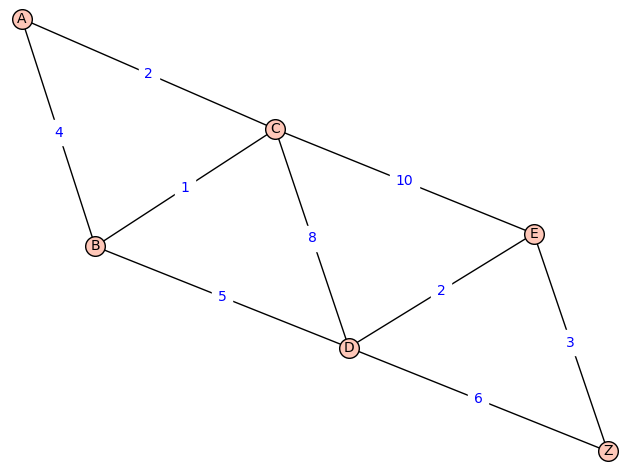

({'A': 0, 'B': 3, 'C': 2, 'D': 8, 'E': 10, 'Z': 13},
 {'A': -1, 'B': 'C', 'C': 'A', 'D': 'B', 'E': 'D', 'Z': 'E'})

In [11]:
import sys



G = Graph()


aretes_ponderees = [
    ('A', 'B', 4),
    ('A', 'C', 2),
    ('B', 'C', 1),
    ('B', 'D', 5),
    ('C', 'D', 8),
    ('C', 'E', 10),
    ('D', 'E', 2),
    ('D', 'Z', 6),
    ('E', 'Z', 3)
]

G.add_edges(aretes_ponderees)

G.plot(edge_labels=True, layout='spring').show()

def min(liste,d):
    min=sys.maxsize
    sommet=-1
    for i in liste :
        if d[f"{i}"]<min:
            min=d[f"{i}"]
            sommet=i
    return sommet

def Djikstra(G,s):
    P=[]
    mini=0
    liste_hors_P= G.vertices()
    d={}
    p={}
    for i in G.vertices(): #liste sommet
        d[f"{i}"]=sys.maxsize
        
    d[f"{s}"]=0
    p[f"{s}"]=-1
    while len(liste_hors_P) > 0:
        mini=min(liste_hors_P,d)
        liste_hors_P.remove(mini)
        P.append(mini) #
        for b in G.neighbors(mini):
            if d[f"{b}"] > d[f"{mini}"] + G.edge_label(mini,b) :
                d[f"{b}"] = d[f"{mini}"] + G.edge_label(mini,b)
                p[f"{b}"] = mini
    return d,p
Djikstra(G,G.vertices()[0])

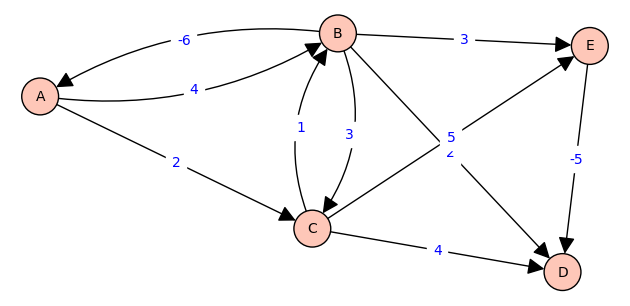

False

In [18]:
G_bf = DiGraph()

aretes_bf = [
    ('A', 'B', 4),
    ('A', 'C', 2),
    ('B','A', -6),
    ('B', 'C', 3),
    ('B', 'D', 2),
    ('B', 'E', 3),
    ('C', 'B', 1),   
    ('C', 'D', 4),
    ('C', 'E', 5),
    ('E', 'D', -5)   
]

G_bf.add_edges(aretes_bf)

G_bf.plot(edge_labels=True).show()

def Bellman_ford(G,s):
    P=[]
    mini=0
    liste_hors_P= G.vertices()
    d={}
    p={}
    for u in G.vertices(): #liste sommet
        d[f"{u}"]=sys.maxsize
        p[f"{u}"]= "NULL"
        
    d[f"{s}"]=0
    p[f"{s}"]=-1
    for k in range(1,len(G.vertices())-1):
        for arc in G.edges():
            if d[f"{arc[0]}"]+ G.edge_label(arc[0],arc[1]) < d[f"{arc[1]}"]:
                d[f"{arc[1]}"] = d[f"{arc[0]}"]+ G.edge_label(arc[0],arc[1])
                p[f"{arc[1]}"] = arc[0]
    for arc in G.edges():
        k=d[f"{arc[0]}"] + G.edge_label(arc[0],arc[1])
        if d[f"{arc[1]}"] > k :
            return False
    return True,d,p

Bellman_ford(G_bf,G_bf.vertices()[0])

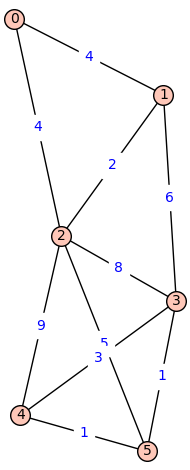

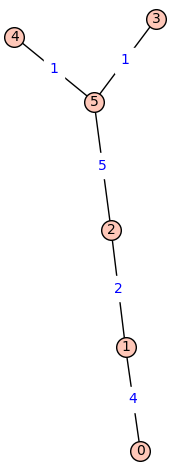

[(3, 5, 1), (4, 5, 1), (1, 2, 2), (0, 1, 4), (2, 5, 5)]


In [33]:

G_test = Graph()

aretes_test = [
    (0, 1, 4),
    (0, 2, 4),  
    (1, 2, 2),
    (1, 3, 6),  
    (2, 3, 8),
    (2, 4, 9),  
    (2, 5, 5),  
    (3, 4, 3),
    (4, 5, 1),  
    (3, 5, 1)   
]

G_test.add_edges(aretes_test)

G_test.plot(edge_labels=True, layout='spring').show()

def Kruskal(G):
    edges = sorted(G.edges(), key=lambda x: x[2] if x[2] is not None else 0)
    Arbre = Graph()
    Arbre.add_vertices(G.vertices())
    
    liste_aretes_finales = []
    for u, v, poids in edges:
        Arbre.add_edge(u, v, poids)
        if not(Arbre.is_forest()):
            Arbre.delete_edge(u, v, poids)
        else:
            liste_aretes_finales.append((u, v, poids))
            
    return Arbre, liste_aretes_finales

Arbre,liste_arete=Kruskal(G_test)
Arbre.plot(edge_labels=True).show()
print(liste_arete)

In [38]:
def trouver_min_prim(liste_sommets, couts):
    minimum = sys.maxsize
    sommet = -1
    for s in liste_sommets:
        if couts[s] < minimum:
            minimum = couts[s]
            sommet = s
    return sommet

def Prim(G, s):
    couts = {}
    parent = {}
    
    for v in G.vertices():
        couts[v] = sys.maxsize
        parent[v] = None
        
    couts[s] = 0 
    non_visites = set(G.vertices())
    while non_visites:
        u = trouver_min_prim(non_visites, couts)
        
        if u == -1 or couts[u] == sys.maxsize:
            break
            
        non_visites.remove(u)
        
        for v in G.neighbors(u):
            if v in non_visites:
                poids = G.edge_label(u, v)
                if poids is None: poids = 1
                if poids < couts[v]:
                    couts[v] = poids
                    parent[v] = u
                    
    return parent

def afficher_prim(G, parents):
    aretes_acm = []
    for v, u in parents.items():
        if u is not None:
            w = G.edge_label(u, v)
            aretes_acm.append((u, v, w))
            
    Arbre = Graph()
    Arbre.add_edges(aretes_acm)
    Arbre.plot(edge_labels=True, main_title="Arbre couvrant (Prim)").show()
    return Arbre
print(G_test.vertices())
afficher_prim(G_test,Prim(G_test,G_test.vertices()[0]))

[0, 1, 2, 3, 4, 5]


ValueError: invalid input 'main_title=Arbre couvrant (Prim)'